In [ ]:
import requests
import pandas as pd
import numpy as np

In [ ]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'


In [ ]:
r = requests.get(url)

In [ ]:
json = r.json()


In [ ]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [ ]:
elements_df.head()


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,...,560,104,305,9,720,78,354,52,0.00,0.00
1,NaN,NaN,58822,0,0,-2,2,0,2,1.0,...,854,271,7,2,454,156,242,96,0.00,0.00
2,100.0,100.0,153256,0,0,-1,1,0,3,1.0,...,532,319,277,26,305,127,473,154,0.00,0.00
3,100.0,100.0,438098,0,0,-1,1,0,3,1.2,...,121,73,757,312,277,116,449,144,0.62,0.31
4,100.0,100.0,226597,0,0,4,-4,3,2,6.4,...,116,13,752,267,45,6,9,2,1.01,0.47


In [ ]:
elements_df.columns


Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [ ]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [ ]:
slim_elements_df.head()


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Balogun,1,4,0.2,44,0,10024,0.0,0
1,Alves Soares,1,2,0.5,38,59,76023,0.8,3
2,Elneny,1,3,0.1,44,25,13751,1.4,6
3,Ferreira Vieira,1,3,0.1,54,290,11816,4.4,24
4,dos Santos Magalhães,1,2,28.3,54,3042,3607340,27.6,149


In [ ]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

<ipython-input-10-d2f8756adc31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [ ]:
slim_elements_df.head()


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Balogun,1,4,0.2,44,0,10024,0.0,0,Forward
1,Alves Soares,1,2,0.5,38,59,76023,0.8,3,Defender
2,Elneny,1,3,0.1,44,25,13751,1.4,6,Midfielder
3,Ferreira Vieira,1,3,0.1,54,290,11816,4.4,24,Midfielder
4,dos Santos Magalhães,1,2,28.3,54,3042,3607340,27.6,149,Defender


In [ ]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


<ipython-input-12-f3497c573517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [ ]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


<ipython-input-13-08fc0254d49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


In [ ]:
slim_elements_df.sort_values('value',ascending=False).head(100)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
289,Palmer,Chelsea,3,51.3,63,2617,7940337,38.7,244,Midfielder,38.7
331,Mateta,Crystal Palace,4,7.3,51,2274,1371528,32.4,165,Forward,32.4
372,Pickford,Everton,1,16.3,48,3420,1923297,31.9,153,Goalkeeper,31.9
484,Morris,Luton,4,4.3,47,2859,2573810,31.1,146,Forward,31.1
27,Rice,Arsenal,3,6.2,55,3225,934076,30.0,165,Midfielder,30.0
...,...,...,...,...,...,...,...,...,...,...,...
753,Kulusevski,Spurs,3,2.1,67,2759,1057724,19.4,130,Midfielder,19.4
391,Iwobi,Fulham,3,0.4,53,2331,220218,19.2,102,Midfielder,19.2
109,Zabarnyi,Bournemouth,2,1.9,44,3330,606573,19.1,84,Defender,19.1
505,Kaminski,Luton,1,0.7,45,3405,195969,19.1,86,Goalkeeper,19.1


In [ ]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()


,position,value
0,Defender,7.199640
1,Forward,6.855752
2,Goalkeeper,5.291000
3,Midfielder,7.179144


In [ ]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,7.199640
3,Midfielder,7.179144
1,Forward,6.855752
2,Goalkeeper,5.291000


In [ ]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]


In [ ]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()


In [ ]:
pivot.sort_values('value',ascending=False)


,position,value
2,Goalkeeper,13.240000
0,Defender,10.479058
1,Forward,10.329333
3,Midfielder,10.326923


In [ ]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()


In [ ]:
team_pivot.sort_values('value',ascending=False)


,team,value
12,Man City,15.077273
0,Arsenal,14.966667
9,Fulham,13.480000
8,Everton,12.650000
7,Crystal Palace,12.619231
3,Brentford,11.035714
19,Wolves,10.884615
1,Aston Villa,10.737931
18,West Ham,10.576923
11,Luton,10.385185


In [ ]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<Axes: >

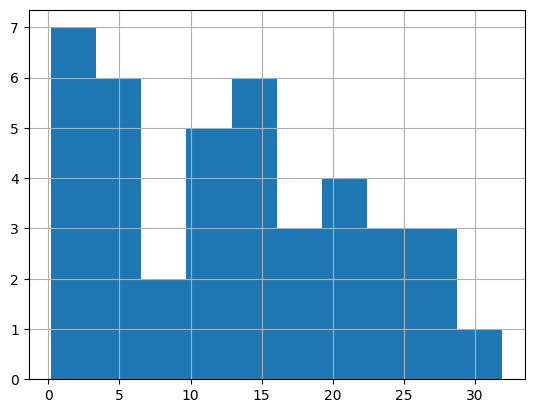

In [ ]:
goal_df.value.hist()

In [ ]:
goal_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
372,Pickford,Everton,1,16.3,48,3420,1923297,31.9,153,Goalkeeper,31.9
400,Leno,Fulham,1,14.6,48,3420,2233825,27.7,133,Goalkeeper,27.7
788,Areola,West Ham,1,22.3,42,2700,3270680,27.6,116,Goalkeeper,27.6
580,Onana,Man Utd,1,15.5,50,3420,1748721,26.6,133,Goalkeeper,26.6
26,Raya Martin,Arsenal,1,11.7,53,2880,1846094,25.5,135,Goalkeeper,25.5
134,Flekken,Brentford,1,4.5,47,3285,1000829,25.3,119,Goalkeeper,25.3
97,Murara Neto,Bournemouth,1,4.2,46,2880,1168959,23.9,110,Goalkeeper,23.9
54,Martínez Romero,Aston Villa,1,10.5,52,3015,1676844,22.1,115,Goalkeeper,22.1
841,Malheiro de Sá,Wolves,1,2.0,50,3037,377733,21.4,107,Goalkeeper,21.4
771,Vicario,Spurs,1,9.4,53,3420,1915164,21.1,112,Goalkeeper,21.1


<Axes: >

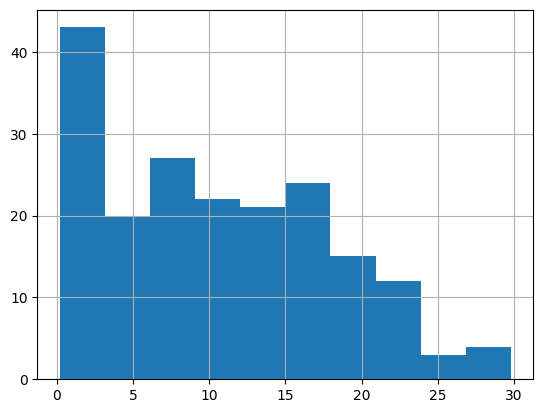

In [ ]:
def_df.value.hist()


In [ ]:
def_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
23,White,Arsenal,2,23.3,61,2987,3267766,29.8,182,Defender,29.8
18,Saliba,Arsenal,2,39.1,59,3420,4896615,27.8,164,Defender,27.8
357,Branthwaite,Everton,2,10.8,45,3116,1773174,27.6,124,Defender,27.6
4,dos Santos Magalhães,Arsenal,2,28.3,54,3042,3607340,27.6,149,Defender,27.6
333,Mitchell,Crystal Palace,2,4.7,45,3204,1452667,26.4,119,Defender,26.4
319,Andersen,Crystal Palace,2,14.1,47,3416,3675248,25.7,121,Defender,25.7
374,Tarkowski,Everton,2,5.4,46,3420,1223405,25.4,117,Defender,25.4
545,Gvardiol,Man City,2,18.1,52,2327,2463879,23.7,123,Defender,23.7
479,Doughty,Luton,2,6.2,43,2923,2078225,23.5,101,Defender,23.5
422,Castagne,Fulham,2,1.6,45,2630,390189,23.3,105,Defender,23.3


In [ ]:
mid_df.sort_values('value',ascending=False).head(30)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
289,Palmer,Chelsea,3,51.3,63,2617,7940337,38.7,244,Midfielder,38.7
27,Rice,Arsenal,3,6.2,55,3225,934076,30.0,165,Midfielder,30.0
608,Gordon,Newcastle,3,20.6,64,2896,6924487,28.6,183,Midfielder,28.6
539,Hernandez,Man City,3,6.1,56,2931,1636010,28.4,159,Midfielder,28.4
48,Soares de Paulo,Aston Villa,3,4.8,54,2994,3152069,27.4,148,Midfielder,27.4
39,Bailey,Aston Villa,3,3.1,54,2063,1217765,27.4,148,Midfielder,27.4
530,Foden,Man City,3,43.3,85,2860,8102135,27.1,230,Midfielder,27.1
602,Guimarães Rodriguez Moura,Newcastle,3,3.3,58,3264,472426,26.4,153,Midfielder,26.4
562,Garnacho,Man Utd,3,9.8,50,2564,2383811,26.2,131,Midfielder,26.2
17,Saka,Arsenal,3,49.2,88,2922,7038452,25.7,226,Midfielder,25.7


In [ ]:
fwd_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
331,Mateta,Crystal Palace,4,7.3,51,2274,1371528,32.4,165,Forward,32.4
484,Morris,Luton,4,4.3,47,2859,2573810,31.1,146,Forward,31.1
678,Wood,Nott'm Forest,4,1.7,47,1801,662821,27.9,131,Forward,27.9
64,Watkins,Aston Villa,4,35.9,89,3222,8842662,25.6,228,Forward,25.6
105,Solanke,Bournemouth,4,17.8,69,3325,6904066,25.4,175,Forward,25.4
521,Álvarez,Man City,4,15.4,64,2644,7295019,24.7,158,Forward,24.7
847,Santos Carneiro Da Cunha,Wolves,4,2.4,55,2438,1898248,24.5,135,Forward,24.5
102,Semenyo,Bournemouth,4,2.0,45,2099,1059698,23.8,107,Forward,23.8
151,Wissa,Brentford,4,5.1,57,2488,2421901,23.0,131,Forward,23.0
404,Muniz Carvalho,Fulham,4,4.4,43,1589,1414446,22.6,97,Forward,22.6


In [ ]:
slim_elements_df.to_csv('FPL.value.csv')